# Author: NADIR ALBAB
DATA SCIENCE & BUSINESS ANALYTICS @ TSF
# GRIP_NOV'21 TASK_02

# Prediction using Unsupervised ML
Clustering using Python

 Importing Libraries & Modules

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.spatial.distance import cdist

Reading Dataset

In [10]:
sd = pd.read_csv('iris.csv')
sd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Describing Dataset

In [11]:
sd=sd.drop(columns = ['Id'])
sd.shape

(150, 5)

In [12]:
sd.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
sd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5



Finding the optimum no. of clusters for k-means classification


C:\Users\nadir albab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


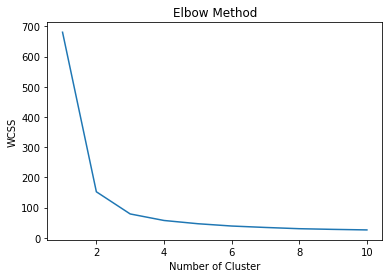

In [15]:
x = sd.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the Line graph results to find elbow
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS') #Within cluster sum of squares
plt.show()



Applying K-means to the dataset of creating the K-means classifier


In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans  = kmeans.fit_predict(x)


Visualising the clusters - On first 2 coloumns


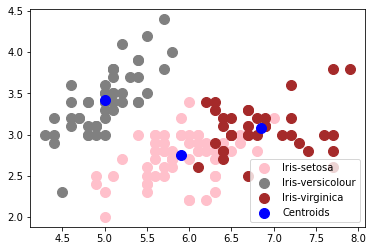

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = 'pink', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = 'grey', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'blue', label= 'Centroids')
plt.legend()

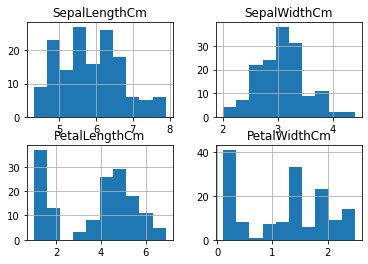

In [26]:
sd.hist()
plt.show()

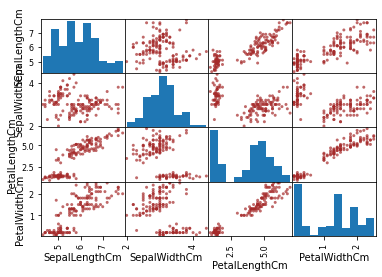

In [27]:
pd.plotting.scatter_matrix(sd, alpha=0.7, c = 'brown')
plt.show()